In [34]:
#importation des packages à utilser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #packer de visualisation
import pickle # packer pour generer et deployer le modele
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
#lecture de la base de données
df = pd.read_csv('/content/drive/MyDrive/Database/D1/train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Exploration et nettoyages des données ( Data Cleaning )**

---



In [ ]:
pd.set_option("Display.max_rows", df.shape[0])
df
# This allows you to display all rows in the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [ ]:
# Identifies missing values: True if missing, False if not
df.isnull().head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# This is a Series: returns True if a column contains missing values, False otherwise
df.isnull().any()

,0
Loan_ID,False
Gender,True
Married,True
Dependents,True
Education,False
Self_Employed,True
ApplicantIncome,False
CoapplicantIncome,False
LoanAmount,True
Loan_Amount_Term,True


In [ ]:
# Count the number of missing values in each column
df.isnull().sum().sort_values(ascending = False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Education,0
Loan_ID,0
CoapplicantIncome,0


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [37]:
# Split the dataset into categorical(qualitative) and numerical(quantitative) variables
v_qli = [] #Variable qualitative
v_qti = [] #Variable quantitative
for i in df.columns:
    if df[i].dtype == 'object':
        v_qli.append(df.loc[:,i])
    else:
        v_qti.append(df.loc[:,i])
v_qli = pd.DataFrame(v_qli).T
v_qti = pd.DataFrame(v_qti).T

In [ ]:
v_qti.isnull().any()

,0
ApplicantIncome,False
CoapplicantIncome,False
LoanAmount,True
Loan_Amount_Term,True
Credit_History,True


In [ ]:
v_qti.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [38]:
# Replace missing values in each column of vqti with the next value in the same column
#v_qti[i] = v_qti[i].fillna(method = 'bfill')
#In this section I chose to replace them with the mean

for i in v_qti.columns:
    v_qti[i] = v_qti[i].fillna(v_qti[i].mean())

In [ ]:
v_qti.isnull().any()

,0
ApplicantIncome,False
CoapplicantIncome,False
LoanAmount,False
Loan_Amount_Term,False
Credit_History,False


In [ ]:
v_qti.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0


In [ ]:
v_qli.isnull().any()

,0
Loan_ID,False
Gender,True
Married,True
Dependents,True
Education,False
Self_Employed,True
Property_Area,False
Loan_Status,False


In [39]:
# Replace missing values in each column of vqli with the most frequent value
for i in v_qli.columns:
    v_qli[i] = v_qli[i].fillna(v_qli[i].mode()[0])

In [ ]:
v_qli.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [40]:
# Séparer et Remplacer la colonne Loan_status par une colonne comprenant des 1 pour Y et 0 pour N
target_values = {'Y':1,'N':0}
target = v_qli['Loan_Status']
v_qli.drop('Loan_Status',axis = 1, inplace=True)
target = target.map(target_values)


In [ ]:
v_qli

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [41]:
# Remplacer les  valeurs de vqli par des valeurs numeriques
le = LabelEncoder()
for i in v_qli.columns:
    v_qli[i] = le.fit_transform(v_qli[i])
v_qli

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [ ]:
target

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [42]:
#Supprimer la colonne LoanId de vqli
v_qli.drop('Loan_ID',axis = 1, inplace=True)

In [43]:
#Concatener vqli, vqti et target
X= pd.concat([v_qli,v_qti],axis = 1)
y = target

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.000000,360.0,1.0


In [44]:
dt = pd.concat([X,target],axis = 1)
dt

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0,1
610,1,1,3,0,0,0,4106.0,0.0,40.000000,180.0,1.0,1
611,1,1,1,0,0,2,8072.0,240.0,253.000000,360.0,1.0,1
612,1,1,2,0,0,2,7583.0,0.0,187.000000,360.0,1.0,1


In [ ]:
target.value_counts()

,count
Loan_Status,
1,422
0,192


# **This section is  dedicaded for the Exploratory Data Analysis ( EDA )**


---

Le pourcentage des credits accordés : 68.72964169381108
Le pourcentage des credits non accordés : 31.27035830618892


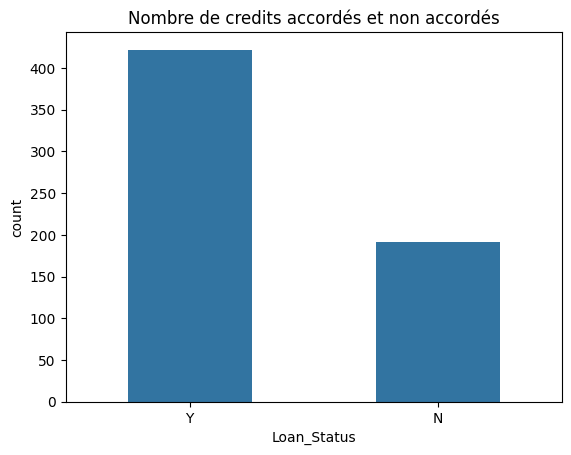

In [46]:

#plt.figure(figsize=(8,6))
sns.countplot(data = df, x="Loan_Status", width=0.5)
plt.title("Nombre de credits accordés et non accordés")
yes = target.value_counts()[1]/len(target)*100
no = target.value_counts()[0]/len(target)*100
print(f"Le pourcentage des credits accordés : {yes}")
print(f"Le pourcentage des credits non accordés : {no}")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


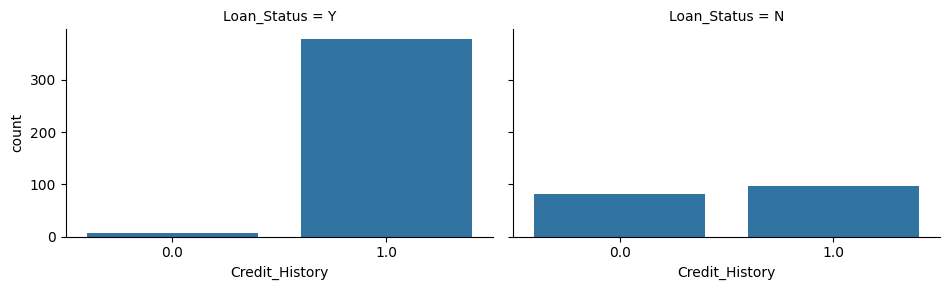

In [47]:
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Credit_History')


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


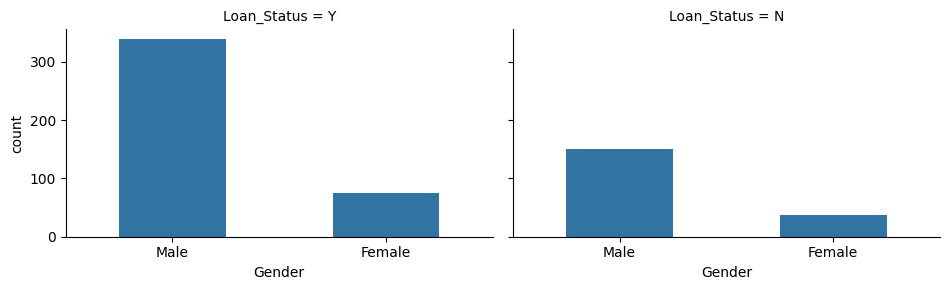

In [67]:
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Gender', width = 0.5)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


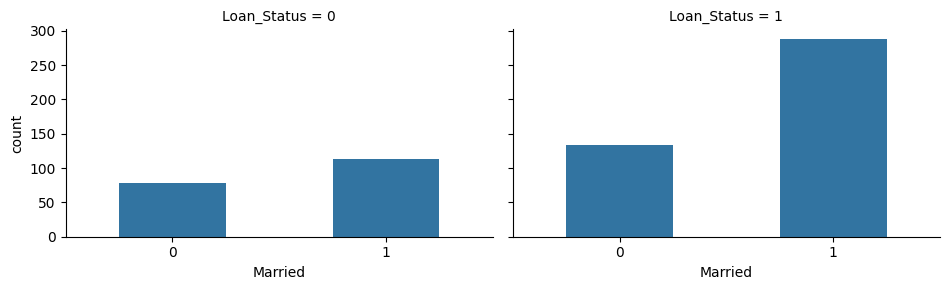

In [ ]:
grid = sns.FacetGrid(dt, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Married', width = 0.5)

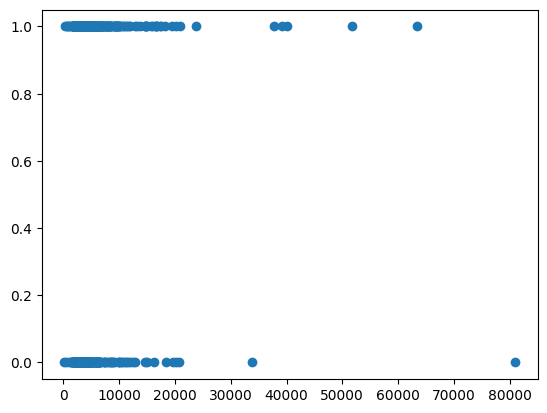

In [ ]:
#revenu du demandeur variable numerique donc autre methode
plt.scatter(dt['ApplicantIncome'],dt['Loan_Status'])

<Axes: >

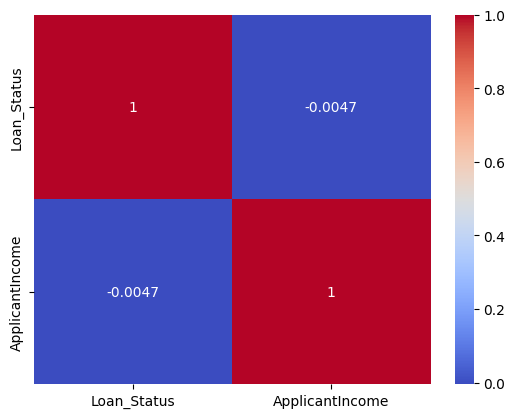

In [57]:
sns.heatmap(dt[['Loan_Status', 'ApplicantIncome']].corr(), annot=True, cmap='coolwarm')

<Axes: >

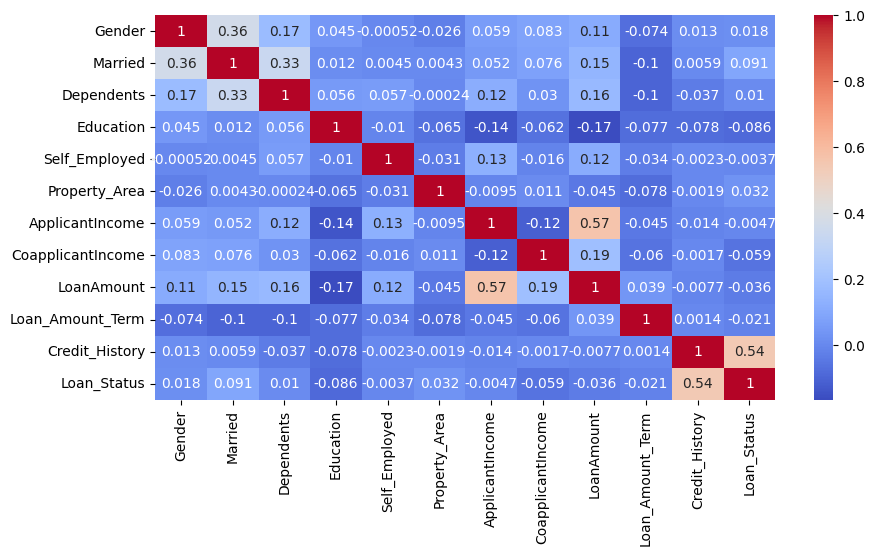

In [69]:
plt.figure(figsize=(10, 5))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm')

In [75]:
dt.corr()['Loan_Status'].sort_values( ascending= False)

,Loan_Status
Loan_Status,1.000000
Credit_History,0.540483
Married,0.091478
Property_Area,0.032112
Gender,0.017987
Dependents,0.010118
Self_Employed,-0.003700
ApplicantIncome,-0.004710
Loan_Amount_Term,-0.020974
LoanAmount,-0.036416


# **MODELISATION : Entrainement du modele**
---



In [76]:
#Les variables retenues pour l'entrainement du modele
X2 = X[["Credit_History", "Gender","Married", 'Property_Area']]
X2

,Credit_History,Gender,Married,Property_Area
0,1.0,1,0,2
1,1.0,1,1,0
2,1.0,1,1,2
3,1.0,1,1,2
4,1.0,1,0,2
...,...,...,...,...
609,1.0,0,0,0
610,1.0,1,1,0
611,1.0,1,1,2
612,1.0,1,1,2


In [79]:
#Diviser la base X en des données d'entrainement et de test
ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in ss.split(X2, y):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [82]:
X_train

,Credit_History,Gender,Married,Property_Area
154,1.0,1,0,2
239,1.0,1,1,1
448,0.0,1,1,0
471,0.0,1,1,0
273,1.0,1,1,1
...,...,...,...,...
222,1.0,1,0,1
349,1.0,1,1,0
26,1.0,1,1,1
96,1.0,0,1,1


In [83]:
#On choisit les algorithmes Logistic regression, KNN, DecisionTree
models = {"LogisticRegression" : LogisticRegression(random_state=42),
         "KNeighborsClassifier" : KNeighborsClassifier(),
         "DecisionTreeClassifier" :DecisionTreeClassifier(max_depth=1, random_state=42)}
def pred(y_true, y_pred, retu = False):
    pd = accuracy_score(y_true, y_pred)
    if retu:
        return pd
    else:
        print(f"La precision du modele est :{pd}")
#Appliquer les modeles
def train_test_fct(models,X_train, X_test, y_train, y_test):
    for name,model in models.items():
      print(name," :")
      model.fit(X_train, y_train)
      pred(y_test,model.predict(X_test))
      print("_"*60)

In [84]:
train_test_fct(models,X_train, X_test, y_train, y_test)

LogisticRegression  :
La precision du modele est :0.8536585365853658
____________________________________________________________
KNeighborsClassifier  :
La precision du modele est :0.8292682926829268
____________________________________________________________
DecisionTreeClassifier  :
La precision du modele est :0.8536585365853658
____________________________________________________________


In [85]:
#On choisit la regression logistic
md = LogisticRegression()
md.fit(X2, y)

LogisticRegression()

In [88]:
#Enregistrer le model
pickle.dump(md,open('Model.pkl','wb'))